In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


# 2.. lets perform data cleaning..


In [3]:
df.shape

(119390, 32)

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.drop(['agent', 'company'], axis=1, inplace=True)

In [6]:
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [7]:
df['country'].fillna(df['country'].value_counts().index[0], inplace=True)

In [8]:
df.fillna(0, inplace=True)

In [9]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [10]:
# Visualise Entire Dataframe where adult,children & babies are 0

filter1 = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)

In [11]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [12]:
data = df[~filter1]

In [13]:
data.shape

(119210, 30)

# 3.. Where do the guests come from ?


In [14]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [15]:
norm = data.loc[data["is_canceled"] == 0,
                "country"].value_counts(normalize=True)
not_norm = data.loc[data["is_canceled"] == 0, "country"].value_counts()
pd.concat([norm, not_norm], axis=1, keys=['norm', 'not_norm']
          ).sort_values('not_norm', ascending=False)

,norm,not_norm
country,,
PRT,0.285265,21398
GBR,0.128888,9668
FRA,0.112890,8468
ESP,0.085094,6383
DEU,0.080881,6067
...,...,...
SMR,0.000013,1
BWA,0.000013,1
MRT,0.000013,1


In [16]:
country_wise_data = data[data['is_canceled'] ==
                         0]['country'].value_counts().reset_index()
country_wise_data.columns = ['country', 'no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [17]:
import plotly
import plotly.express as px
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [18]:
map_guest = px.choropleth(country_wise_data,
                          locations=country_wise_data['country'],
                          color=country_wise_data['no_of_guests'],
                          hover_name=country_wise_data['country'],
                          title='home country of guests'
                          )

In [19]:
map_guest.show()

# 4.. How much do guests pay for a room per night ?


In [20]:
data2 = data[data['is_canceled'] == 0]
data2.shape

(75011, 30)

Text(0, 0.5, 'price( EUR)')

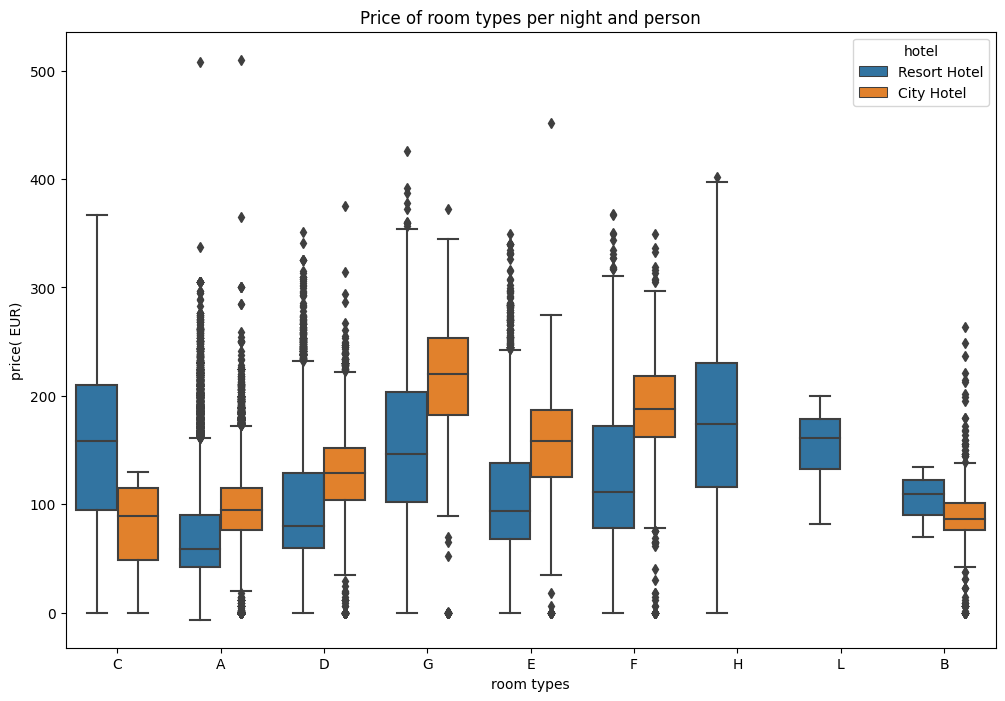

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2)

plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

# 5.. Which are the most busy month ?


In [22]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [23]:
data_resort = data[(data['hotel'] == 'Resort Hotel')
                   & (data['is_canceled'] == 0)]
data_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [24]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['month', 'no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [25]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['month', 'no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [26]:
final_rush = rush_resort.merge(rush_city, on='month')
final_rush.columns = ['month', 'no_of_guests_in_resort', 'no_of_guests_city']
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [27]:
import sort_dataframeby_monthorweek as sd
final_rush = sd.Sort_Dataframeby_Month(final_rush, 'month')
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [28]:
px.line(data_frame=final_rush, x='month', y=[
        'no_of_guests_in_resort', 'no_of_guests_city'])

# 6.. which month has highest adr ?


In [29]:
data = sd.Sort_Dataframeby_Month(data, 'arrival_date_month')

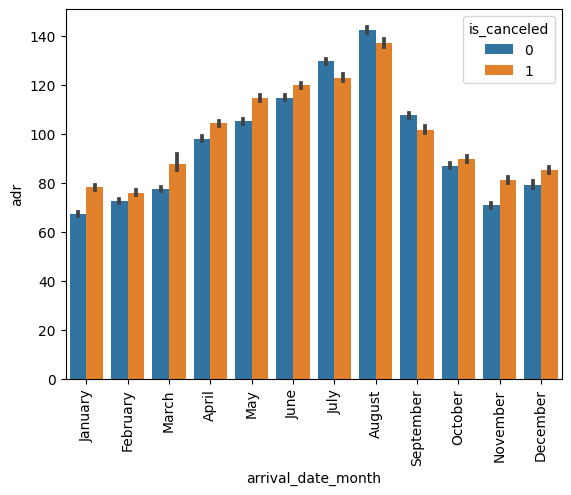

In [30]:
sns.barplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

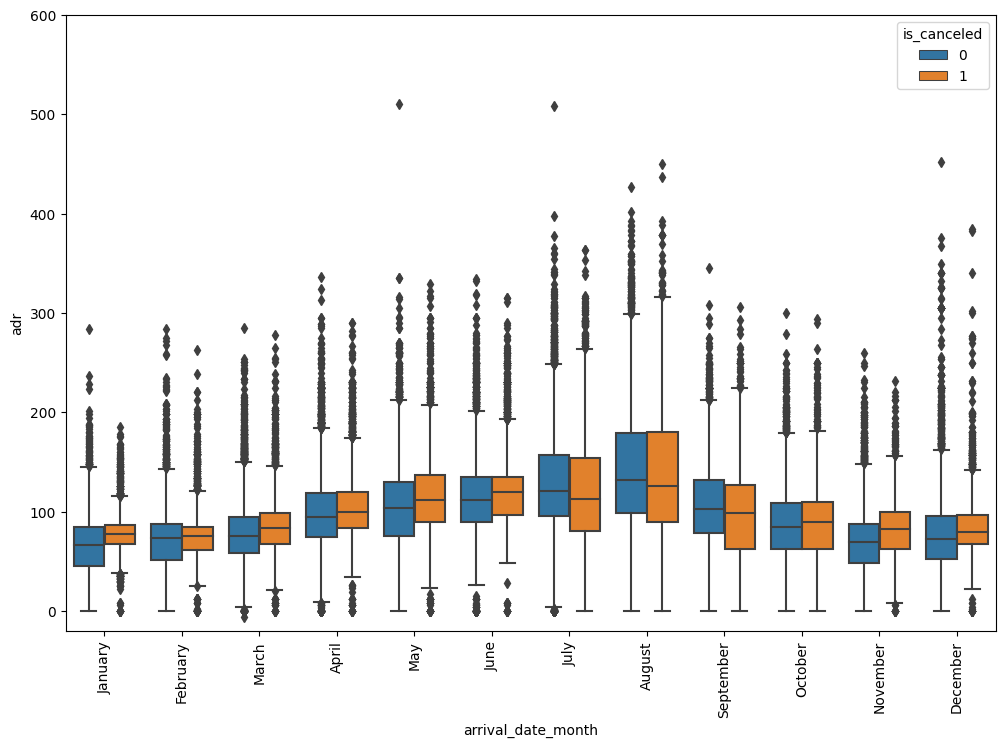

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='arrival_date_month', y='adr', data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.ylim(-20, 600)
plt.show()

# 7.. Lets analyse whether bookings were made only for weekdays or for weekends or for both ??


In [32]:
# Lets create a relationship table..
pd.crosstab(index=data['stays_in_weekend_nights'],
            columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,913,38,24,11,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,34,15,7,5,9,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,2,11,11,7,71,8,3,3,35,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,1,2,5,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,3,34,11,7,0,0,0,0,0,0,0,0,0,0


In [33]:
def week_function(data):
    weekend = data['stays_in_weekend_nights']
    week = data['stays_in_week_nights']

    if weekend > 0 and week == 0:
        return 'stay_just_weekend'
    elif weekend == 0 and week > 0:
        return 'stay_just_weekdays'
    elif weekend > 0 and week > 0:
        return 'stay_weekend_and_weekdays'
    else:
        return 'undefined_data'

In [34]:
# def week_function(row):
#     feature1 = 'stays_in_weekend_nights'
#     feature2 = 'stays_in_week_nights'

#     if row[feature2] == 0 and row[feature1] > 0:
#         return 'stay_just_weekend'

#     elif row[feature2] > 0 and row[feature1] == 0:
#         return 'stay_just_weekdays'

#     elif row[feature2] > 0 and row[feature1] > 0:
#         return 'stay_both_weekdays_weekends'

#     else:
#         return 'undefined_data'

In [35]:
data2['weekend_or_weekday'] = data2.apply(week_function, axis=1)

In [36]:
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays


In [37]:
data2['weekend_or_weekday'].value_counts()

weekend_or_weekday
stay_weekend_and_weekdays    37551
stay_just_weekdays           31788
stay_just_weekend             5050
undefined_data                 622
Name: count, dtype: int64

In [38]:
data2 = sd.Sort_Dataframeby_Month(data2, 'arrival_date_month')

In [39]:
data2.groupby(['arrival_date_month', 'weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday       
April               stay_just_weekdays           2559
                    stay_just_weekend             344
                    stay_weekend_and_weekdays    3627
                    undefined_data                 30
August              stay_just_weekdays           3137
                    stay_just_weekend             509
                    stay_weekend_and_weekdays    4929
                    undefined_data                 49
December            stay_just_weekdays           2123
                    stay_just_weekend             298
                    stay_weekend_and_weekdays    1901
                    undefined_data                 69
February            stay_just_weekdays           2514
                    stay_just_weekend             360
                    stay_weekend_and_weekdays    2438
                    undefined_data                 47
January             stay_just_weekdays           2125
                    stay_just_weeken

In [40]:
group_data = data2.groupby(
    ['arrival_date_month', 'weekend_or_weekday']).size().unstack().reset_index()

In [41]:
sorted_data = sd.Sort_Dataframeby_Month(group_data, 'arrival_date_month')

In [42]:
sorted_data.set_index('arrival_date_month', inplace=True)

In [43]:
sorted_data

,stay_just_weekdays,stay_just_weekend,stay_weekend_and_weekdays,undefined_data
arrival_date_month,,,,
January,2125,393,1550,47
February,2514,360,2438,47
March,3060,359,3151,50
April,2559,344,3627,30
May,3017,570,3442,74
June,2685,433,3241,36
July,2818,462,4570,57
August,3137,509,4929,49
September,2692,479,3192,22


<Axes: xlabel='arrival_date_month'>

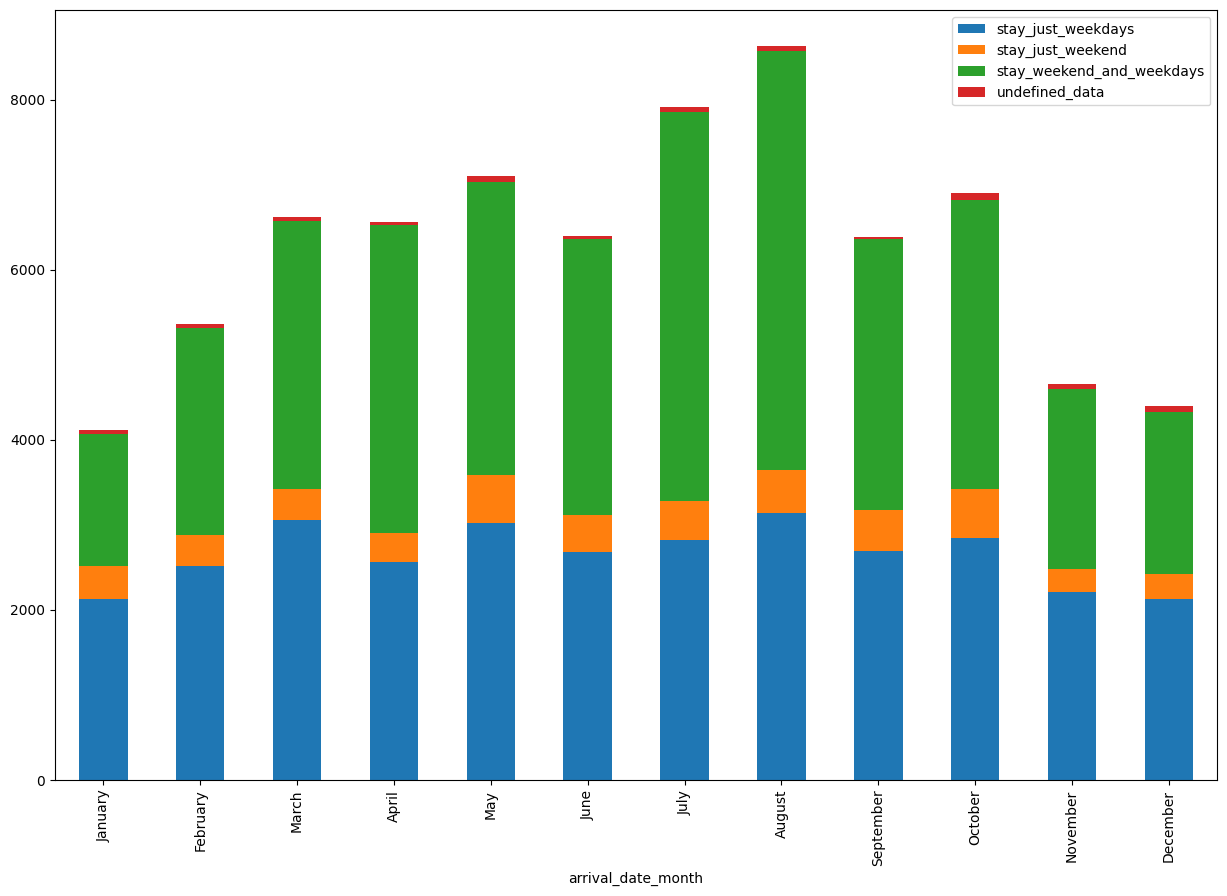

In [44]:
sorted_data.plot(kind='bar', stacked=True, figsize=(15, 10))

# 8.. How to create some more features ..


In [45]:
def family(data):
    adults = data["adults"]
    children = data["children"]
    babies = data["babies"]

    if adults > 0 and (children > 0 or babies > 0):
        return 1
    else:
        return 0

In [46]:
# def family(row):
#     if (row['adults'] > 0) & (row['children'] > 0 or row['babies'] > 0):
#         return 1
#     else:
#         return 0

In [47]:
data['is_family'] = data.apply(family, axis=1)

In [48]:
data['total_customer'] = data['adults'] + data['babies'] + data['children']

In [49]:
data['total_nights'] = data['stays_in_week_nights'] + \
    data['stays_in_weekend_nights']

In [50]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [51]:
dict1 = {'No Deposit': 0, 'Non Refund': 1, 'Refundable': 0}

In [52]:
data['deposit_given'] = data['deposit_type'].map(dict1)

In [53]:
data.drop(columns=['adults', 'children', 'babies',
          'deposit_type'], axis=1, inplace=True)

# 9.. how to apply Feature encoding on data


In [54]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,RUS,Online TA,TA/TO,0,0,0,A,D,0,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,RUS,Online TA,TA/TO,0,0,0,H,H,0,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,ARG,Online TA,TA/TO,0,0,0,A,D,0,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,0,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0


In [55]:
cate_features = [col for col in data.columns if data[col].dtype == 'object']

In [56]:
num_features = [col for col in data.columns if data[col].dtype != 'object']

In [57]:
data_cat = data[cate_features]

In [58]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [59]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [60]:
data_cat['cancellation'] = data['is_canceled']

In [61]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [62]:
cat_cols = data_cat.columns

In [63]:
cat_cols = cat_cols[:-1]

In [64]:
cat_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [65]:
# Perform Mean Encoding Technique

for col in cat_cols:
    dict_map = data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col] = data_cat[col].map(dict_map)

In [66]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0.0,0.108247,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1.0,0.684211,1


# 10.. Handle Outliers


In [67]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [68]:
dataframe = pd.concat([data_cat, data[num_features]], axis=1)

In [69]:
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0.0,0.108247,0,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1.0,0.684211,1,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0


In [70]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [71]:
dataframe.drop(['cancellation'], axis=1, inplace=True)

<Axes: xlabel='lead_time', ylabel='Density'>

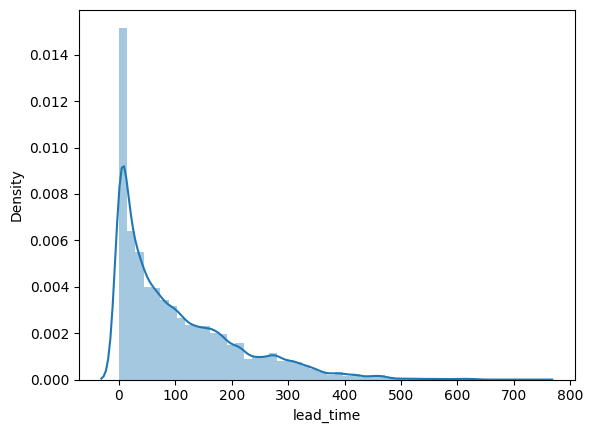

In [72]:
sns.distplot(dataframe['lead_time'])

In [73]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [74]:
handle_outlier('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

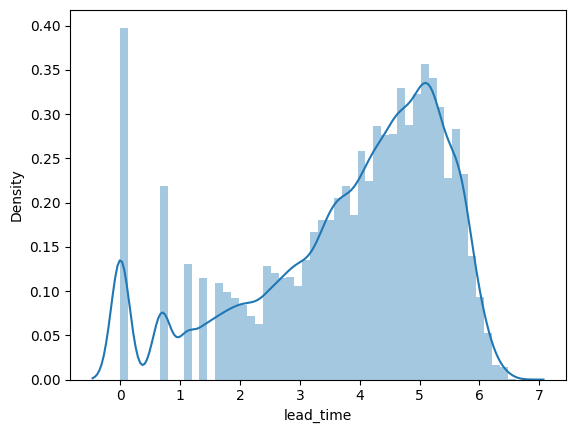

In [75]:
sns.distplot(dataframe['lead_time'])

<Axes: xlabel='adr', ylabel='Density'>

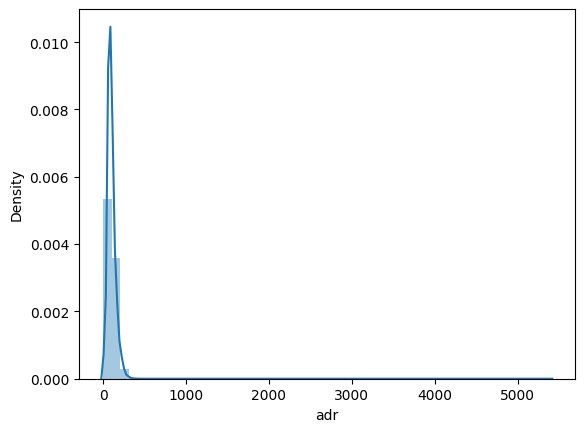

In [76]:
sns.distplot(dataframe['adr'])

In [77]:
dataframe[dataframe['adr'] < 0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,0.328767,0,5.278115,2017,10,5,4,6,1,0,2,2,0,-6.38,0,0,0,2.0,10,0


In [78]:
handle_outlier('adr')

In [79]:
dataframe['adr'].isnull().sum()

1

In [80]:
# now why this missing value , as we have already deal with the missing values..'
# bcz we have negative value in 'adr' feature as '-6.38'  ,& if we apply ln(1+x) , we will get 'nan'
# bcz log wont take negative values..

<Axes: xlabel='adr', ylabel='Density'>

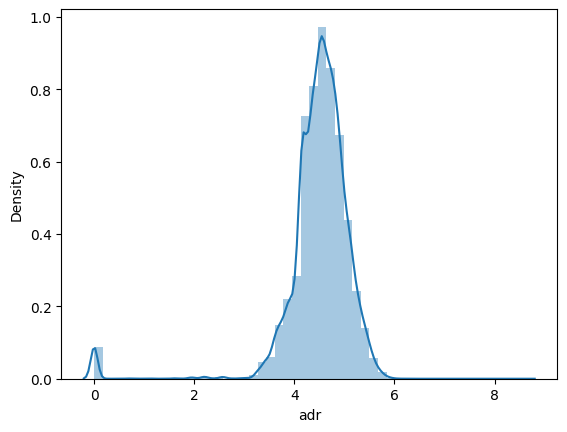

In [81]:
sns.distplot(dataframe['adr'].dropna())

# 11.. Select important Features using Co-relation & univariate analysis..


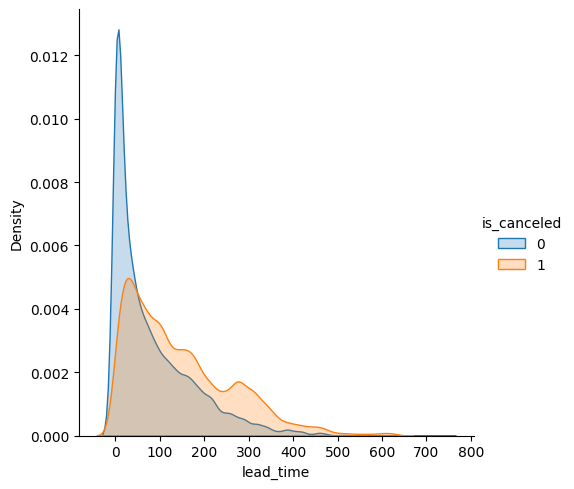

In [82]:
sns.FacetGrid(data, hue='is_canceled', aspect=1, height=5).map(
    sns.kdeplot, "lead_time", shade=True).add_legend()

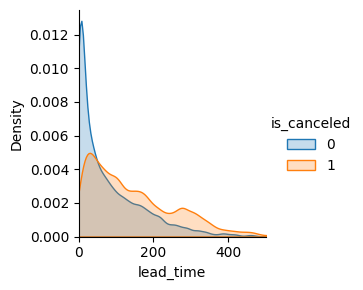

In [83]:
sns.FacetGrid(data, hue='is_canceled', xlim=(0, 500)).map(
    sns.kdeplot, 'lead_time', shade=True).add_legend()

In [84]:
corr = dataframe.corr()
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,0.107481,0.137082,0.109869,0.035176,0.001241,-0.001678,-0.187816,-0.235955,-0.052526,-0.012261,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,-0.089512,0.069886,0.241413,0.015509,0.155653,0.002248,0.046618,0.036681,-0.057691,0.008800,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,0.038298,0.050584,-0.040315,-0.024568,0.015308,-0.005737,-0.040114,-0.053540,0.009827,0.103606,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,0.340400,0.357232,-0.071919,-0.180684,0.017322,0.001898,-0.146467,-0.138467,0.153305,0.093266,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,0.276512,0.267006,0.397346,-0.064498,0.009895,0.008062,0.001091,-0.006660,-0.169328,0.074710,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,0.081435,0.177167,0.332215,0.013924,0.010940,-0.003948,0.079220,0.072280,-0.206695,-0.003868,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,0.148830,0.072769,0.026146,-0.092503,0.010119,-0.016947,-0.147017,-0.175821,0.032507,0.049290,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,0.191989,0.201570,0.142173,-0.025296,0.005852,-0.011957,-0.082287,-0.095544,-0.028268,0.063309,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,0.055937,0.136617,-0.135881,0.204725,-0.067980,-0.002012,0.037025,0.031095,0.002727,-0.021358,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,0.488307,1.000000,0.320075,0.016622,0.008315,-0.005948,-0.001323,0.025542,-0.083745,0.110139,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.481507


In [85]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [86]:
features_to_drop = ['reservation_status', 'reservation_status_date', 'arrival_date_year',
                    'arrival_date_week_number', 'stays_in_weekend_nights',
                    'arrival_date_day_of_month']

In [87]:
dataframe.drop(features_to_drop, axis=1, inplace=True)

In [88]:
dataframe.shape

(119210, 24)

# 12.. How to find Important features for model building..


In [89]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [90]:
dataframe.dropna(inplace=True)

In [91]:
# separate dependent & independent features
x = dataframe.drop('is_canceled', axis=1)
y = dataframe['is_canceled']

In [92]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [93]:
# Lasso(alpha=0.005)
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

In [94]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))

In [95]:
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [96]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [97]:
cols = x.columns

In [98]:
# let's print the number of selected features

selected_feature = cols[feature_sel_model.get_support()]
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [99]:
x = x[selected_feature]

# 13.. Lets build ML model..


In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [103]:
print(X_train.shape, X_test.shape)

(89406, 12) (29803, 12)


In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [106]:
y_pred = log_reg.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix

In [108]:
confusion_matrix(y_test, y_pred)

array([[17381,  1300],
       [ 4798,  6324]], dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(y_test, y_pred)

0.7953897258665235

# 14.. How to cross-validate model..


In [111]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(log_reg, x, y, cv=10)
score

array([0.77862595, 0.7841624 , 0.78240081, 0.81301904, 0.81486452,
       0.7393675 , 0.74020636, 0.8557168 , 0.8307189 , 0.80385906])

In [112]:
score.mean()

0.7942941352156732

# 15.. playing with multiple algos..


In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [114]:
models = []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive_bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision_tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [116]:
for model_name, model in models:
    print(model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    score = accuracy_score(y_test, y_pred)
    print(score)

    print("*" * 50)

LogisticRegression
[[17381  1300]
 [ 4798  6324]]
0.7953897258665235
**************************************************
Naive_bayes
[[ 6734 11947]
 [  699 10423]]
0.575680300640875
**************************************************
Random Forest
[[17149  1532]
 [ 2786  8336]]
0.8551152568533369
**************************************************
Decision_tree
[[15977  2704]
 [ 2691  8431]]
0.8189779552394054
**************************************************
KNN
[[16669  2012]
 [ 3403  7719]]
0.8183068818575311
**************************************************
